# Atividade 4

Considere um conjunto de dados obtidos analisando imagens de câncer de mama, onde há o diagnóstico se o tumor é maligno ou benigno. Seu objetivo é desenvolver e avaliar modelos para realizar a classificação de câncer de mama em Maligno (1) ou Benigno (0). Esse modelo deve ter uma saída probabilística que indique a probabilidade de um tumor ser maligno. Você deverá cumprir os seguintes requerimentos:

1) Carregue o conjunto de dados Breast Cancer Wisconsin (Diagnostic) Data Set. Ele pode ser obtido através do sklearn.datasets, da UCI Machine Learning Repository ou do Kaggle.

2) Realize uma breve análise exploratória dos dados, criando ao menos 3 gráficos. Há desbalanceamento entre as classes? Extra: quais atributos são mais importantes para classificação?

3) Separe os dados em conjuntos de treino e teste, usando random_state = 42. Os dados de treino podem ser subdivididos em treino e validação de forma livre para ajustar hiperparâmetros.

4) Treine e avalie no conjunto de teste um modelo de regressão logística usando hiperparâmetros default e todos os dados de entrada, como baseline de desempenho. Lembre-se de normalizar os dados de entrada. As métricas de avaliação serão Acurácia, Precision, Recall, F1 score e AUC.

5) Treine pelo menos mais 3 modelos de regressão logística diferentes, treinando e avaliando nos conjuntos de treino e validação. Modelos diferentes incluem usar atributos diferentes, transformações não-lineares nos atributos (regressão logística polinomial) ou diferentes hiperparâmetros. Após isso, escolha o melhor desses modelos para retreinar com todos os dados de treino e avalie no conjunto de teste. Compare com o resultado com a baseline. Dica: pode-se utilizar o grid search.

6) Extra: utilize um modelo ainda não estudado na mentoria para realizar a classificação, avaliando no conjunto de teste. Compare os resultados.

In [186]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [187]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [188]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [189]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [190]:
df['target'].count
maligno = 0
benigno = 0
for i in range(len(df['target'])):
    if df['target'][i] == 1:
        maligno += 1
    else:
        benigno += 1
print(f'Quantidade de tumores benignos: {benigno}')
print(f'Quantidade de tumores malignos: {maligno}')
#Existe uma quantidade muito maior de tumores malignos, logo o dataset é desbalanceado.

Quantidade de tumores benignos: 212
Quantidade de tumores malignos: 357


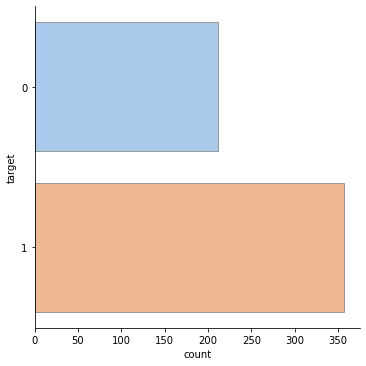

In [191]:
sns.catplot(y="target", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

<AxesSubplot:xlabel='mean compactness', ylabel='mean concavity'>

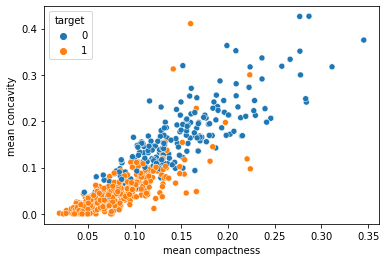

In [192]:
sns.scatterplot(x='mean compactness', y='mean concavity', hue='target', data=df)

<AxesSubplot:xlabel='mean compactness', ylabel='worst symmetry'>

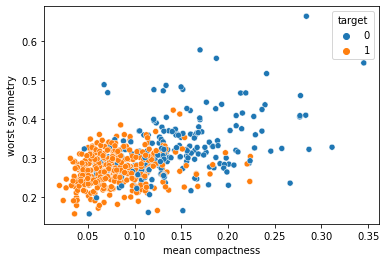

In [193]:
sns.scatterplot(x='mean compactness', y='worst symmetry', hue='target', data=df)

<AxesSubplot:xlabel='worst fractal dimension', ylabel='mean fractal dimension'>

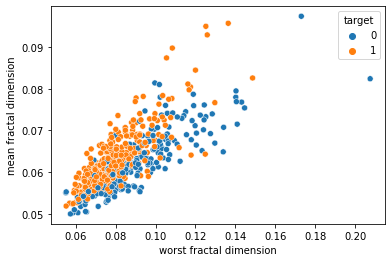

In [194]:
sns.scatterplot(x='worst fractal dimension', y='mean fractal dimension', hue='target', data=df)

<AxesSubplot:xlabel='mean fractal dimension', ylabel='mean texture'>

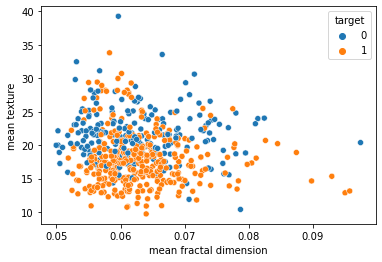

In [195]:
sns.scatterplot(x='mean fractal dimension', y='mean texture', hue='target', data=df)

### Dados que serão utilizados nos modelos:

In [196]:
X = df.drop(['target'], axis=1)
y = df['target'].to_numpy().reshape(-1, 1)

In [197]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_valid_n = scaler.fit_transform(X_train_valid)
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)
X_valid_n = scaler.transform(X_valid)

### 1° Modelo - Baseline

#### Treinando no conjunto de treino, e testando no de teste.

In [198]:
LRB = LogisticRegression()
LRB.fit(X_train_valid_n, y_train_valid.ravel())

LogisticRegression()

In [199]:
y_predictB = LRB.predict(X_test_n).reshape(-1, 1)

In [200]:
from sklearn.metrics import accuracy_score
A1 = accuracy_score(y_test, y_predictB)
A1

0.9736842105263158

In [201]:
from sklearn.metrics import f1_score
F1 = f1_score(y_test, y_predictB)
F1

0.9793103448275862

In [202]:
from sklearn.metrics import precision_score
P1 = precision_score(y_test, y_predictB)
P1

0.9594594594594594

In [203]:
from sklearn.metrics import recall_score
R1 = recall_score(y_test, y_predictB)
R1

1.0

In [204]:
from sklearn.metrics import roc_auc_score
AUC1 = roc_auc_score(y_test, y_predictB)
AUC1

0.9651162790697674

### 2° Modelo - GridSearchCV

#### Treinando no conjunto de treino, e ajustando no de validação.

In [205]:
LRG = LogisticRegression()
LRG.fit(X_train_n, y_train.ravel())

LogisticRegression()

In [206]:
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings('ignore')
metricas = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']
parameters = {'penalty':['l2', 'none'],
              'max_iter':[25, 50, 100, 200],
              'solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
clf = GridSearchCV(LRG, param_grid=parameters, scoring=metricas, refit='precision', return_train_score=False)
clf.fit(X_train_n, y_train.ravel())
clf.best_estimator_

LogisticRegression(max_iter=50, penalty='none', solver='sag')

In [207]:
y_predictG = clf.predict(X_valid_n)

In [208]:
A2 = accuracy_score(y_valid, y_predictG)
P2 = precision_score(y_valid, y_predictG)
R2 = recall_score(y_valid, y_predictG)
F2 = f1_score(y_valid, y_predictG)
AUC2 = roc_auc_score(y_valid, y_predictG)
print(f'accuracy: {A2}')
print(f'precision: {P2}')
print(f'recall: {R2}')
print(f'f1 score: {F2}')
print(f'AUC: {AUC2}')

accuracy: 0.967032967032967
precision: 0.9642857142857143
recall: 0.9818181818181818
f1 score: 0.972972972972973
AUC: 0.9631313131313131


### 3° Modelo - Regressão Logística Polinomial

In [209]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train_n)
X_poly_valid = poly.transform(X_valid_n)

In [210]:
LRP = LogisticRegression(max_iter=25, penalty='none', solver='saga')
LRP.fit(X_poly, y_train.ravel())

LogisticRegression(max_iter=25, penalty='none', solver='saga')

In [211]:
y_predictP = LRP.predict(X_poly_valid)

In [212]:
A3 = accuracy_score(y_valid, y_predictP)
P3 = precision_score(y_valid, y_predictP)
R3 = recall_score(y_valid, y_predictP)
F3 = f1_score(y_valid, y_predictP)
AUC3 = roc_auc_score(y_valid, y_predictP)
print(f'accuracy: {A3}')
print(f'precision: {P3}')
print(f'recall: {R3}')
print(f'f1 score: {F3}')
print(f'AUC: {AUC3}')

accuracy: 0.945054945054945
precision: 0.9464285714285714
recall: 0.9636363636363636
f1 score: 0.9549549549549549
AUC: 0.9401515151515151


### 4° Modelo(Extra) - SVM

#### Modelo treinado com o conjunto de treino, e avaliado no conjunto de teste.

In [213]:
from sklearn import svm
S = svm.SVC(max_iter=70, tol=0.01, C=2.0)
S.fit(X_train_n, y_train)
y_predictS = S.predict(X_test_n)

In [214]:
AS = accuracy_score(y_test, y_predictS)
PS = precision_score(y_test, y_predictS)
RS = recall_score(y_test, y_predictS)
FS = f1_score(y_test, y_predictS)
AUCS = roc_auc_score(y_test, y_predictS)
print(f'accuracy: {AS}')
print(f'precision: {PS}')
print(f'recall: {RS}')
print(f'f1 score: {FS}')
print(f'AUC: {AUCS}')

accuracy: 0.9824561403508771
precision: 0.9726027397260274
recall: 1.0
f1 score: 0.9861111111111112
AUC: 0.9767441860465117


### Comparação do segundo e do terceiro modelo, para decidir qual será avaliado no conjunto de teste.

In [215]:
data = {'Modelos': ['2° Modelo(GridSearch)','3° Modelo(polinomial)'],
        'accuracy': [A2, A3],
        'precision': [P2, P3],
        'recall': [R2, R3],
        'f1': [F2,F3],
        'AUC':[AUC2, AUC3]}
tabela = pd.DataFrame(data)
tabela

,Modelos,accuracy,precision,recall,f1,AUC
0,2° Modelo(GridSearch),0.967033,0.964286,0.981818,0.972973,0.963131
1,3° Modelo(polinomial),0.945055,0.946429,0.963636,0.954955,0.940152


#### Pela tabela, pode-se ver que o modelo no qual foi utilizado o GridSearch se mostrou superior na maioria das métricas, sendo assim, ele foi o escolhido para ser treinado no conjunto de teste.

### Avaliando o 2° modelo no conjunto de teste.

In [216]:
LRT = LogisticRegression(max_iter=50, penalty='none', solver='sag')
LRT.fit(X_train_valid_n, y_train_valid.ravel())

LogisticRegression(max_iter=50, penalty='none', solver='sag')

In [217]:
y_predictT = LRT.predict(X_test_n)

In [218]:
AT = accuracy_score(y_test, y_predictT)
PT = precision_score(y_test, y_predictT)
RT = recall_score(y_test, y_predictT)
FT = f1_score(y_test, y_predictT)
AUCT = roc_auc_score(y_test, y_predictT)
print(f'accuracy: {AT}')
print(f'precision: {PT}')
print(f'recall: {RT}')
print(f'f1 score: {FT}')
print(f'AUC: {AUCT}')

accuracy: 0.9736842105263158
precision: 0.9722222222222222
recall: 0.9859154929577465
f1 score: 0.979020979020979
AUC: 0.969701932525385


### Comparação dos modelos

In [219]:
data = {'Modelos': ['Baseline', 'GridSearch', 'SVM'],
        'accuracy': [A1, AT, AS],
        'precision': [P1, PT, PS],
        'recall': [R1, RT, RS],
        'f1': [F1,FT, FS],
        'AUC':[AUC1, AUCT, AUCS]}
tabela = pd.DataFrame(data)
tabela

,Modelos,accuracy,precision,recall,f1,AUC
0,Baseline,0.973684,0.959459,1.000000,0.979310,0.965116
1,GridSearch,0.973684,0.972222,0.985915,0.979021,0.969702
2,SVM,0.982456,0.972603,1.000000,0.986111,0.976744


##### Como pode-se ver na tabela acima, os modelos Baseline e GridSearch apresentaram uma discrepância muito pequena nas métricas, o modelo em que foi utilizado GridSearch se mostrou levemente superior nas métricas "precision" e "AUC", porém, o baseline se mostrou superior em "recall" e "f1 score", os dois modelos empataram na métrica de acurácia. Por outro lado, o modelo utilizando SVM se mostrou superior em praticamente todas as métricas, sendo ele, o melhor modelo do teste.